Reading Tweets

Structuring Tweets

Analyzing tweets by language

Analyzing tweets by country



TypeError: Empty 'DataFrame': no numeric data to plot

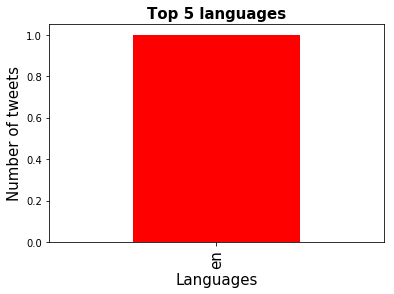

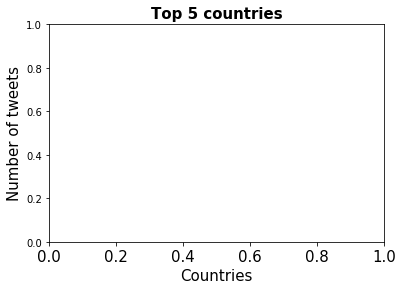

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False


def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''


def main():


    #Reading Tweets
    print 'Reading Tweets\n'
    tweets_data_path = './tuits.txt'

    tweets_data = []
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue


	#Structuring Tweets
	print 'Structuring Tweets\n'
	tweets = pd.DataFrame()
	tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
	tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
	tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)


	#Analyzing Tweets by Language
	print 'Analyzing tweets by language\n'
	tweets_by_lang = tweets['lang'].value_counts()
	fig, ax = plt.subplots()
	ax.tick_params(axis='x', labelsize=15)
	ax.tick_params(axis='y', labelsize=10)
	ax.set_xlabel('Languages', fontsize=15)
	ax.set_ylabel('Number of tweets' , fontsize=15)
	ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
	tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
	plt.savefig('tweet_by_lang', format='png')


	#Analyzing Tweets by Country
	print 'Analyzing tweets by country\n'
	tweets_by_country = tweets['country'].value_counts()
	fig, ax = plt.subplots()
	ax.tick_params(axis='x', labelsize=15)
	ax.tick_params(axis='y', labelsize=10)
	ax.set_xlabel('Countries', fontsize=15)
	ax.set_ylabel('Number of tweets' , fontsize=15)
	ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
	tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
	plt.savefig('tweet_by_country', format='png')


	#Adding programming languages columns to the tweets DataFrame
	print 'Adding programming languages tags to the data\n'
	tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
	tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
	tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))


	#Analyzing Tweets by programming language: First attempt
	print 'Analyzing tweets by programming language: First attempt\n'
	prg_langs = ['python', 'javascript', 'ruby']
	tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True], tweets['ruby'].value_counts()[True]]
	x_pos = list(range(len(prg_langs)))
	width = 0.8
	fig, ax = plt.subplots()
	plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')
	ax.set_ylabel('Number of tweets', fontsize=15)
	ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
	ax.set_xticks([p + 0.4 * width for p in x_pos])
	ax.set_xticklabels(prg_langs)
	plt.grid()
	plt.savefig('tweet_by_prg_language_1', format='png')


	#Targeting relevant tweets
	print 'Targeting relevant tweets\n'
	tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
	tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))
	tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))


	#Analyzing Tweets by programming language: Second attempt
	print 'Analyzing tweets by programming language: First attempt\n'
	tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]
	x_pos = list(range(len(prg_langs)))
	width = 0.8
	fig, ax = plt.subplots()
	plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
	ax.set_ylabel('Number of tweets', fontsize=15)
	ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
	ax.set_xticks([p + 0.4 * width for p in x_pos])
	ax.set_xticklabels(prg_langs)
	plt.grid()
	plt.savefig('tweet_by_prg_language_2', format='png')


	#Extracting Links
	tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))
	tweets_relevant = tweets[tweets['relevant'] == True]
	tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

	print '\nBelow are some Python links that we extracted\n'
	print tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link'].head()

if __name__=='__main__':
	main()